In [4]:
using Revise, Pkg
Pkg.activate("../.")
using QuickVega, DataFrames, VegaLite, VegaDatasets
using Distributions, DataFrames, KernelDensity
using Contour

 Activating environment at `~/MEGAsync/EMAp/QuickVega.jl/Project.toml`


In [17]:
m = [1,1]
μa = [2 1]
μb = [3 3]
Σ = [10 0;
    0 1]
Σa = [1 0;
      0 1]
Σb = [1 0;
      0 1]
mvn = MvNormal(m,Σ)
fmv(x,y) = pdf(mvn,[x,y])

fmv (generic function with 1 method)

In [39]:
y = -4:0.1:4
x = -2:0.1:4

z = [round(fmv(xi,yi),digits=5) for xi in x, yi in y];
# Contour.levels(contours(x,y,z))
df = Array{Float64}(undef, 0, 4)
group = 0
for cl in Contour.levels(Contour.contours(x,y,z))
    lvl = level(cl) # the z-value of this contour level
    for line in lines(cl)
        xs, ys = coordinates(line) # coordinates of this line segment
        df = vcat(df,[xs ys ones(length(xs))*lvl ones(length(xs))*group])
        group += 1
    end
end
df = DataFrame(df,["x","y","z","group"]);

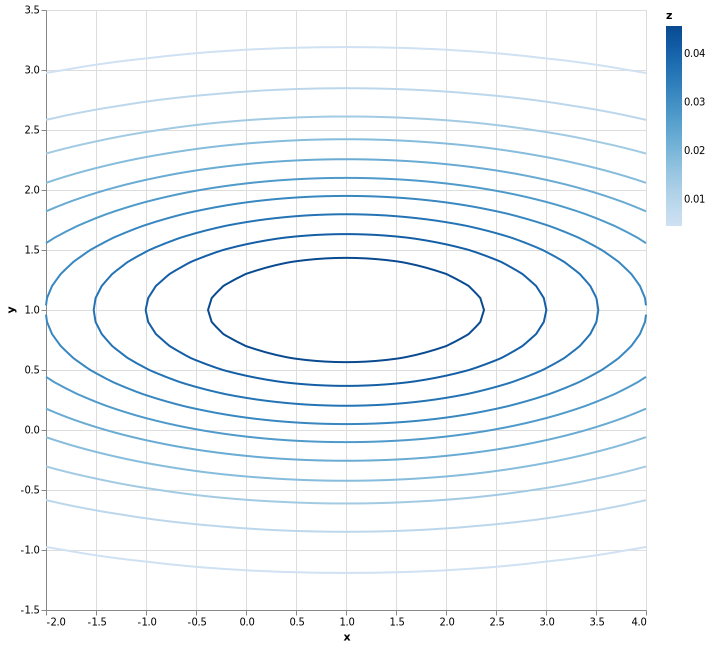

In [40]:
@vlplot(width=600,height=600,data=df,:line,x=:x,y=:y,color={:z,type="q"},order ={field =:row, type=:q },detail="group")